torch.Size([7000, 500]) torch.Size([7000, 1]) torch.Size([3000, 500]) torch.Size([3000, 1])
torch.Size([256, 500])
torch.Size([256])
torch.Size([1, 256])
torch.Size([1])
epoch 1,train_loss 0.015323,test_loss 0.014876
epoch 2,train_loss 0.014219,test_loss 0.013920
epoch 3,train_loss 0.013122,test_loss 0.012973
epoch 4,train_loss 0.011951,test_loss 0.011959
epoch 5,train_loss 0.010661,test_loss 0.010823
epoch 6,train_loss 0.009283,test_loss 0.009612
epoch 7,train_loss 0.007856,test_loss 0.008333
epoch 8,train_loss 0.006466,test_loss 0.007070
epoch 9,train_loss 0.005196,test_loss 0.005899
epoch 10,train_loss 0.004102,test_loss 0.004848
epoch 11,train_loss 0.003223,test_loss 0.003983
epoch 12,train_loss 0.002556,test_loss 0.003301
epoch 13,train_loss 0.002059,test_loss 0.002771
epoch 14,train_loss 0.001703,test_loss 0.002377
epoch 15,train_loss 0.001449,test_loss 0.002088
epoch 16,train_loss 0.001262,test_loss 0.001867
epoch 17,train_loss 0.001124,test_loss 0.001703
epoch 18,train_loss 0.0

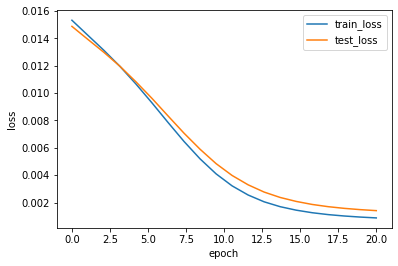

In [1]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
from IPython import display
import torch.utils.data as Data

num_inputs = 500
num_examples = 10000
true_w = torch.ones(500,1)*0.0056
true_b = 0.028
#随机生成的数据样本
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)#行*列=10000*500
labels = torch.mm(features,true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float) #扰动项
#训练集和测试集上的样本&标签数----真实的特征和样本
trainfeatures = features[:7000]
trainlabels = labels[:7000]
testfeatures = features[7000:]  
testlabels = labels[7000:]
print(trainfeatures.shape,trainlabels.shape,testfeatures.shape,testlabels.shape)

#获得数据迭代器
batch_size = 50 # 设置小批量大小
def load_array(data_arrays, batch_size, is_train=True):  #自定义函数
    #"""构造一个PyTorch数据迭代器。"""
    dataset = Data.TensorDataset(*data_arrays)#features 和 labels作为list传入，得到PyTorch的一个数据集
    return Data.DataLoader(dataset, batch_size, shuffle=is_train,num_workers=0)#返回的是实例化后的DataLoader
train_iter = load_array([trainfeatures,trainlabels],batch_size)
test_iter = load_array([testfeatures,testlabels],batch_size)

#实现FlattenLayer层：将数据展平
class FlattenLayer (nn.Module):
    def _init_ (self):
        super(FlattenLayer,self)._init_()
    def forward (self,x):
        return x.view(x.shape[0],-1)
    
#模型定义和参数初始化
# num_inputs = 500
num_hiddens = 256
num_outputs = 1
net = nn.Sequential(
        FlattenLayer(),#输入层
        nn.Linear(num_inputs,num_hiddens),#隐藏层
        nn.ReLU(),#隐藏层激活函数Relu
        nn.Linear(num_hiddens,num_outputs),#输出层
        )
for param in net.parameters():
    print (param.shape)
    init.normal_(param,mean=0,std=0.01)
net.parameters()
lr=0.01
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(),lr)
#记录列表（list），存储训练集和测试集上经过每一轮次，loss的变化
def train1 (net,train_iter,test_iter,loss,num_epochs,batch_size,params = None,lr=None,optimizer=None):
    train_loss=[]
    test_loss=[]
    for epoch in range(num_epochs):#外循环控制循环轮次
        #step1在训练集上，进行小批量梯度下降更新参数
        for X,y in train_iter:#内循环控制训练批次
            y_hat = net(X)
            l = loss(y_hat,y)#l.size = torch.Size([]),即说明loss为表示*标量*的tensor`
            #梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                SGD(params,lr,batch_size)
            else:
                optimizer.step()
        #step2 每经过一个轮次的训练， 记录训练集和测试集上的loss
        train_labels = trainlabels.view(-1,1)  
        test_labels = testlabels.view(-1,1) 
        train_loss.append((loss(net(trainfeatures),train_labels)).item())#loss本身就默认了取平均值！
        test_loss.append((loss(net(testfeatures),test_labels)).item())
        print("epoch %d,train_loss %.6f,test_loss %.6f"%(epoch+1,train_loss[epoch],test_loss[epoch])) 
    return train_loss, test_loss
lr=0.01
num_epochs = 20
#batch_size、params epc已经定义
train_loss, test_loss = train1 (net,train_iter,test_iter,loss,num_epochs,batch_size,net.parameters(),lr,optimizer)#每一给optimizer,默认None

import matplotlib.pyplot as plt
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

torch.Size([14000, 200]) torch.Size([14000, 1]) torch.Size([6000, 200]) torch.Size([6000, 1])
epoch 1,train_loss 0.015323,test_loss 0.014876
epoch 2,train_loss 0.014219,test_loss 0.013920
epoch 3,train_loss 0.013122,test_loss 0.012973
epoch 4,train_loss 0.011951,test_loss 0.011959
epoch 5,train_loss 0.010661,test_loss 0.010823
epoch 6,train_loss 0.009283,test_loss 0.009612
epoch 7,train_loss 0.007856,test_loss 0.008333
epoch 8,train_loss 0.006466,test_loss 0.007070
epoch 9,train_loss 0.005196,test_loss 0.005899
epoch 10,train_loss 0.004102,test_loss 0.004848
epoch 11,train_loss 0.003223,test_loss 0.003983
epoch 12,train_loss 0.002556,test_loss 0.003301
epoch 13,train_loss 0.002059,test_loss 0.002771
epoch 14,train_loss 0.001703,test_loss 0.002377
epoch 15,train_loss 0.001449,test_loss 0.002088
epoch 16,train_loss 0.001262,test_loss 0.001867
epoch 17,train_loss 0.001124,test_loss 0.001703
epoch 18,train_loss 0.001023,test_loss 0.001581
epoch 19,train_loss 0.000945,test_loss 0.001488
epo

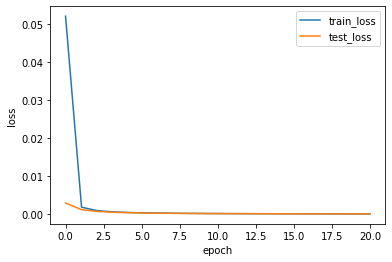

In [2]:
import torch
import numpy as np
import random
from IPython import display
from matplotlib import pyplot as plt
from torch import nn
import torch.utils.data as Data
import torch.optim as optim
from torch.nn import init

num_inputs = 200
#1类
x1 = torch.normal(2,1,(10000, num_inputs))
y1 = torch.ones(10000,1) # 标签1 
x1_train = x1[:7000]
x1_test = x1[7000:]
#0类
x2 = torch.normal(-2,1,(10000, num_inputs))
y2 = torch.zeros(10000,1) # 标签0
x2_train = x2[:7000]
x2_test = x2[7000:]
#合并训练集
trainfeatures = torch.cat((x1_train,x2_train), 0).type(torch.FloatTensor)
trainlabels = torch.cat((y1[:7000], y2[:7000]), 0).type(torch.FloatTensor)
#合并测试集
testfeatures = torch.cat((x1_test,x2_test), 0).type(torch.FloatTensor)
testlabels = torch.cat((y1[7000:], y2[7000:]), 0).type(torch.FloatTensor)
print(trainfeatures.shape,trainlabels.shape,testfeatures.shape,testlabels.shape)

batch_size = 50
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(trainfeatures, trainlabels)
# 把 dataset 放入 DataLoader
train_iter = Data.DataLoader(
    dataset=dataset, # torch TensorDataset format
    batch_size=batch_size, # mini batch size
    shuffle=True, # 是否打乱数据 (训练集一般需要进行打乱)
    num_workers=0, # 多线程来读数据， 注意在Windows下需要设置为0
)
# 将测试数据的特征和标签组合
dataset = Data.TensorDataset(testfeatures, testlabels)
# 把 dataset 放入 DataLoader
test_iter = Data.DataLoader(
    dataset=dataset, # torch TensorDataset format
    batch_size=batch_size, # mini batch size
    shuffle=False, # 是否打乱数据 (训练集一般需要进行打乱)
    num_workers=0, # 多线程来读数据， 注意在Windows下需要设置为0
)
#实现FlattenLayer层
#完成将数据集展平的操作，保证一个样本的数据变成一个数组
class FlattenLayer(torch.nn.Module):
    def __init__(self):
         super(FlattenLayer, self).__init__()
    def forward(self, x):
        return x.view(x.shape[0],-1)
# #模型构建
num_hiddens,num_outputs = 256,1
net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs,num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens,num_outputs),
        )
for params in net.parameters():
    init.normal_(params,mean=0,std=0.01)
# 定义二分类交叉熵损失函数
loss = torch.nn.BCEWithLogitsLoss()
# 定义sgd优化器
optimizer = torch.optim.SGD(net.parameters(),lr)
#定义模型训练函数
def train2(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    train_ls = []
    test_ls = []
    for epoch in range(num_epochs): # 训练模型一共需要num_epochs个迭代周期
        train_l_sum, train_acc_num,n = 0.0,0.0,0
        # 在每一个迭代周期中，会使用训练数据集中所有样本一次
        for X, y in train_iter: # x和y分别是小批量样本的特征和标签
            y_hat = net(X)
            l = loss(y_hat, y.view(-1,1)) # l是有关小批量X和y的损失
            #梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward() # 小批量的损失对模型参数求梯度
            if optimizer is None:
                SGD(params,lr)
            else:
                optimizer.step()
            #计算每个epoch的loss
            train_l_sum += l.item()*y.shape[0]
            #每一个epoch的所有样本数
            n+= y.shape[0]
        train_labels = trainlabels.view(-1,1)
        test_labels = testlabels.view(-1,1)
        train_ls.append(train_l_sum/n)
        test_ls.append(loss(net(testfeatures),test_labels).item())
        print("epoch %d,train_loss %.6f,test_loss %.6f"%(epoch+1,train_loss[epoch],test_loss[epoch])) 
    return train_ls,test_ls
lr = 0.01
num_epochs = 20
train_loss,test_loss = train2(net,train_iter,test_iter,loss,num_epochs,batch_size,net.parameters,lr,optimizer)
import matplotlib.pyplot as plt
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

tensor([[ 0.1428, -2.8546, -1.6359,  0.6920, -0.6296, -0.5586, -4.8998,  6.9726,
         -0.7776,  3.1059],
        [ 2.3096, -0.4873,  4.6295,  2.2892, -4.0116,  2.1053,  3.7338, -6.5171,
          1.7106, -5.4087],
        [-3.0559,  4.7891,  0.8791,  0.6430, -1.6265, -0.7474, -0.3839, -0.2103,
          0.8146, -0.7833],
        [ 7.2414, -6.7511,  0.1606, -0.1565, -2.6850,  2.9878,  1.2709, -0.3333,
         -0.5054, -1.5477],
        [-0.8085, -4.2709,  0.3944, -2.2240,  3.9578, -0.9954,  0.3904,  0.6743,
          0.3383,  2.4993],
        [-4.1172,  5.6425,  0.6610,  1.2124, -1.9018, -1.0414, -1.8777,  0.6324,
          1.3275, -0.2229],
        [-2.8439, -2.8956, -2.9791, -0.1491,  3.7473,  1.3317, -1.8261,  0.8564,
          1.4315,  3.2325],
        [-3.8977, -0.8409, -1.9047, -0.4439,  2.6862,  0.4297, -0.2862,  0.1360,
          1.0550,  3.1776],
        [ 0.7926, -2.5289,  2.0524, -3.1436,  1.7284,  0.4656,  3.8618, -3.4004,
          0.9344, -0.6036],
        [-1.5528, -

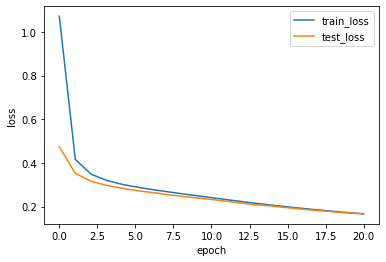

In [5]:
import torch
from torch import nn
import torch.utils.data as Data
import torch.optim as optim
from torch.nn import init
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
from IPython import display
from matplotlib import pyplot as plt

#下载MNIST手写数据集 :包括训练集和测试集
train_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True,  download=True, transform=transforms.ToTensor())  
test_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False,  download=True, transform=transforms.ToTensor())  

batch_size = 32  
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=0)  
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,  num_workers=0) 

#超参数初始化
num_inputs=784 #28*28
num_hiddens=256 #num_hiddens的值即隐层单元个数，还可为16,32,64...512,1024
num_outputs=10
#实现FlattenLayer层
class FlattenLayer(nn.Module):
    def _init_(self):
        super(FlattenLayer,self)._init_()
    def forward(self, x):
        return x.view(x.shape[0],-1)#不管是否有展平的需要，都要加上，在这个例子中，显然有。
#模型定义
net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs,num_hiddens),
        #nn.ReLU(),
        #nn.Sigmoid(),
        nn.Tanh(),
        nn.Linear(num_hiddens,num_outputs)
    )
for param in net.parameters():
    init.normal_(param,mean=0,std=0.01)
lr=0.01
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr)
#返回准确率以及loss
flag=0
def evaluate_accuracy_loss(net, data_iter):
    acc_sum=0.0
    loss_sum=0.0
    n=0
    global flag
    for X,y in data_iter:
        y_hat = net(X)
        if flag==0:print (y_hat)#测试一下y_hat是否已经softmax激活
        flag = 1
        acc_sum += (y_hat.argmax(dim=1)==y).sum().item()
        l = loss(y_hat,y)
        loss_sum += l.item()*y.shape[0]#由于loss(y_hat,y)默认为求平均，因此*y.shape[0]意味着求和。
        n+=y.shape[0]
    return acc_sum/n,loss_sum/n
#记录列表（list），存储训练集和测试集上经过每一轮次，loss的变化
def train3 (net,train_iter,test_iter,loss,num_epochs,batch_size,params = None,lr=None,optimizer=None):
    train_loss=[]
    test_loss=[]
    for epoch in range(num_epochs):#外循环控制循环轮次---跑完一轮，也就把数据走了一遍
        train_l_sum=0.0#记录训练集上的损失
        train_acc_num=0.0#记录训练集上的准确数
        n =0.0
        #step1在训练集上，进行小批量梯度下降更新参数
        for X,y in train_iter:#内循环控制训练批次
            y_hat = net(X)
            #保证y与y_hat维度一致，否则将会发生广播
            l = loss(y_hat,y)#这里计算出的loss是已经求和过的，l.size = torch.Size([]),即说明loss为表示*标量*的tensor`
            #梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                SGD(params,lr,batch_size)
            else:
                optimizer.step()
            #每一个迭代周期中得到的训练集上的loss累积进来
            train_l_sum += l.item()*y.shape[0]
            #计算训练样本的准确率---将每个迭代周期中预测正确的样本数累积进来
            train_acc_num += (y_hat.argmax(dim=1)==y).sum().item()#转为int类型
            n += y.shape[0]
        #step2 每经过一个轮次的训练， 记录训练集和测试集上的loss
        #注意要取平均值，loss默认求了sum
        train_loss.append(train_l_sum/n)#训练集loss
        test_acc,test_l = evaluate_accuracy_loss(net,test_iter)
        test_loss.append(test_l)
        print("epoch %d,train_loss %.6f,test_loss %.6f,train_acc %.6f,test_acc %.6f"%(epoch+1,train_loss[epoch],test_loss[epoch],train_acc_num/n,test_acc)) 
    return train_loss, test_loss
lr = 0.01
num_epochs = 20
train_loss,test_loss = train3(net,train_iter,test_iter,loss,num_epochs,batch_size,net.parameters,lr,optimizer)
import matplotlib.pyplot as plt
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

epoch 1, loss 0.3980, train acc 0.777, test acc 0.819
epoch 2, loss 0.0221, train acc 0.772, test acc 0.696
epoch 3, loss 0.0095, train acc 0.691, test acc 0.710
epoch 4, loss 0.0069, train acc 0.703, test acc 0.709
epoch 5, loss 0.0058, train acc 0.724, test acc 0.697
epoch 6, loss 0.0051, train acc 0.744, test acc 0.760
epoch 7, loss 0.0047, train acc 0.758, test acc 0.765
epoch 8, loss 0.0043, train acc 0.773, test acc 0.783
epoch 9, loss 0.0040, train acc 0.785, test acc 0.779
epoch 10, loss 0.0038, train acc 0.795, test acc 0.801


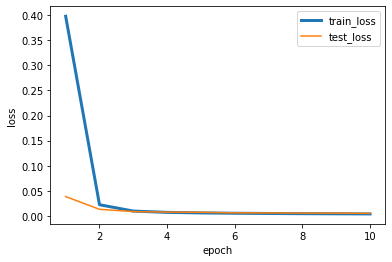

In [6]:
import torch.nn as nn
from torch.nn import init
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

mnist_train = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, download=True, transform=transforms.ToTensor())

batch_size = 200
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x):
        return x.view(x.shape[0], -1)


net = nn.Sequential(  # 本次设置两层隐藏层（三层神经网络）
     FlattenLayer(),
     nn.Linear(num_inputs, num_hiddens1),
     nn.ReLU(),                         
     nn.Linear(num_hiddens1, num_hiddens2),
     nn.ReLU(),
     nn.Linear(num_hiddens2, num_outputs)
     )

for params in net.parameters():
    init.normal_(params, mean=0, std=1)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)

def evaluate_accuracy(test_iter, net):
    acc_sum, n = 0, 0
    for X, y in test_iter:
        y_hat = net(X)
        acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    return acc_sum / n

num_epochs = 10

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer):
    train_ls, test_ls, x_epoch = [], [], []
    for epoch in range(num_epochs):
        train_1_sum, train_acc_sum, n = 0.0, 0.0, 0
        train_1_test_sum, n_test = 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            train_1_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        train_ls.append(train_1_sum / n)
        x_epoch.append(epoch + 1)
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_1_sum / n, train_acc_sum / n, test_acc))

        for X_test, y_test in test_iter:
            y_hat = net(X_test)
            l = loss(y_hat, y_test).sum()
            train_1_test_sum += l.item()
            n_test += y_test.shape[0]
        test_ls.append(train_1_test_sum / n_test)


    plt.plot(x_epoch, train_ls, label="train_loss", linewidth=3)
    plt.plot(x_epoch, test_ls, label="test_loss", linewidth=1.5)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()


train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer)